<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#962626;
             background-color:#962626;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Heart Disease  Prediction🫀 </h1>
</div>


<table align="left">
  <td>
    <a
       href="https://colab.research.google.com/github/zedann/atom_machine_learning_project/blob/main/model/indicators-of-heart-disease.ipynb" 
       target="_parent">
       <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
  </td>
</table>

<br>


<center>
    <a>
        <img src="https://dvl2h13awlxkt.cloudfront.net/assets/general-images/Knowledge/_1200x630_crop_center-center_82_none/CVD-iStock-1266230179.jpg?mtime=1653282867"
             border="0" 
             width=900
             height=470  
             class="center">
    </a>


**problem statement**

<a id="table"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color:#b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Table Of Content </h1>
</div>

<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title></title>
    </head>
<body>

<ol>
    <li><a href="#8">Dataset Exploring</a></li>
    <li><a href="#1">Cleaning</a></li>
    <li><a href="#2">EDA and Visualizing</a></li>
    <li><a href="#4">Preprocessing Pipelines</a></li>
    <li><a href="#5">Sampling</a></li>
    <li><a href="#6">Modeling</a></li>
    <li><a href="#7">Hyperparameter Tuning</a></li>
</ol>

</body>
</html>


<a id="8"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Exploring Dataset </h1>
</div>

In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./data\merged_data.csv


In [2]:
import seaborn as sns    
import matplotlib.pyplot as plt 

import missingno as msno 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# general style
sns.set_style("darkgrid")
sns.set_palette("RdYlBu")

In [3]:
df = pd.read_csv("./data\merged_data.csv")
print(df.shape)
df.head()

(764927, 18)


,Sex,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,SleepTime,Stroke,Asthma,SkinCancer,Diabetic,BMI,AlcoholDrinking,Race,AgeCategory,HeartDisease,KidneyDisease,Smoking,DiffWalking
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
1,Female,Very good,0.0,0.0,No,8.0,No,No,No,Yes,NaN,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
2,Female,Excellent,0.0,0.0,No,6.0,No,No,Yes,No,26.57,No,"White only, Non-Hispanic",Age 80 or older,No,No,Never smoked,No
3,Female,Very good,2.0,3.0,Yes,5.0,No,No,Yes,No,25.61,No,"White only, Non-Hispanic",Age 55 to 59,No,No,Never smoked,No
4,Female,Excellent,0.0,0.0,Yes,7.0,No,Yes,No,No,23.30,No,"White only, Non-Hispanic",NaN,No,No,Current smoker - now smokes some days,No


In [4]:
df.columns

Index(['Sex', 'GenHealth', 'PhysicalHealth', 'MentalHealth',
       'PhysicalActivity', 'SleepTime', 'Stroke', 'Asthma', 'SkinCancer',
       'Diabetic', 'BMI', 'AlcoholDrinking', 'Race', 'AgeCategory',
       'HeartDisease', 'KidneyDisease', 'Smoking', 'DiffWalking'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764927 entries, 0 to 764926
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               764927 non-null  object 
 1   GenHealth         763729 non-null  object 
 2   PhysicalHealth    754000 non-null  float64
 3   MentalHealth      755860 non-null  float64
 4   PhysicalActivity  763834 non-null  object 
 5   SleepTime         759474 non-null  float64
 6   Stroke            763370 non-null  object 
 7   Asthma            763154 non-null  object 
 8   SkinCancer        761784 non-null  object 
 9   Diabetic          763840 non-null  object 
 10  BMI               716121 non-null  float64
 11  AlcoholDrinking   718353 non-null  object 
 12  Race              750870 non-null  object 
 13  AgeCategory       755848 non-null  object 
 14  HeartDisease      761862 non-null  object 
 15  KidneyDisease     763001 non-null  object 
 16  Smoking           72

<a id="1"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Dataset Cleaning </h1>
</div>

In [6]:
col_order = ['Sex',  'AgeCategory', 'BMI',  #user info
             'GenHealth', 'PhysicalActivity', 'PhysicalHealth', 'MentalHealth', #genral health and habits
             'SleepTime', 'DiffWalking',
             'Smoking', 'AlcoholDrinking',
             'KidneyDisease', 'Asthma', 'SkinCancer', #user medical history
             'Stroke', 'Diabetic',
             'Race',
             'HeartDisease']

df = df[col_order]
df.head()

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
0,Female,Age 80 or older,NaN,Very good,No,0.0,0.0,8.0,No,Never smoked,No,No,No,No,No,Yes,"White only, Non-Hispanic",No
1,Female,Age 80 or older,NaN,Very good,No,0.0,0.0,8.0,No,Never smoked,No,No,No,No,No,Yes,"White only, Non-Hispanic",No
2,Female,Age 80 or older,26.57,Excellent,No,0.0,0.0,6.0,No,Never smoked,No,No,No,Yes,No,No,"White only, Non-Hispanic",No
3,Female,Age 55 to 59,25.61,Very good,Yes,2.0,3.0,5.0,No,Never smoked,No,No,No,Yes,No,No,"White only, Non-Hispanic",No
4,Female,NaN,23.30,Excellent,Yes,0.0,0.0,7.0,No,Current smoker - now smokes some days,No,No,Yes,No,No,No,"White only, Non-Hispanic",No


In [7]:
nans = df.isna().sum().sort_values(ascending = False)
pct = (nans/df.shape[0]) * 100
pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaNValuesCount', 1 : 'NaNValuesPercentage%'}).round(2)

,NaNValuesCount,NaNValuesPercentage%
BMI,48806,6.38
AlcoholDrinking,46574,6.09
Smoking,35462,4.64
DiffWalking,24012,3.14
Race,14057,1.84
PhysicalHealth,10927,1.43
AgeCategory,9079,1.19
MentalHealth,9067,1.19
SleepTime,5453,0.71
SkinCancer,3143,0.41


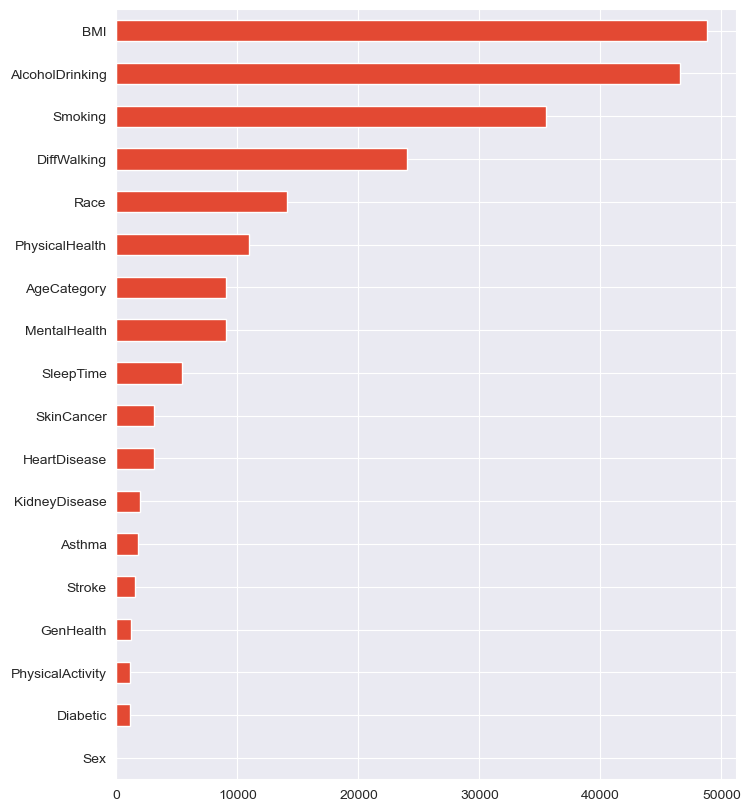

In [8]:
# Set the size
plt.figure(figsize=(8, 10))

df.isna().sum().sort_values().plot(kind='barh')
plt.show()

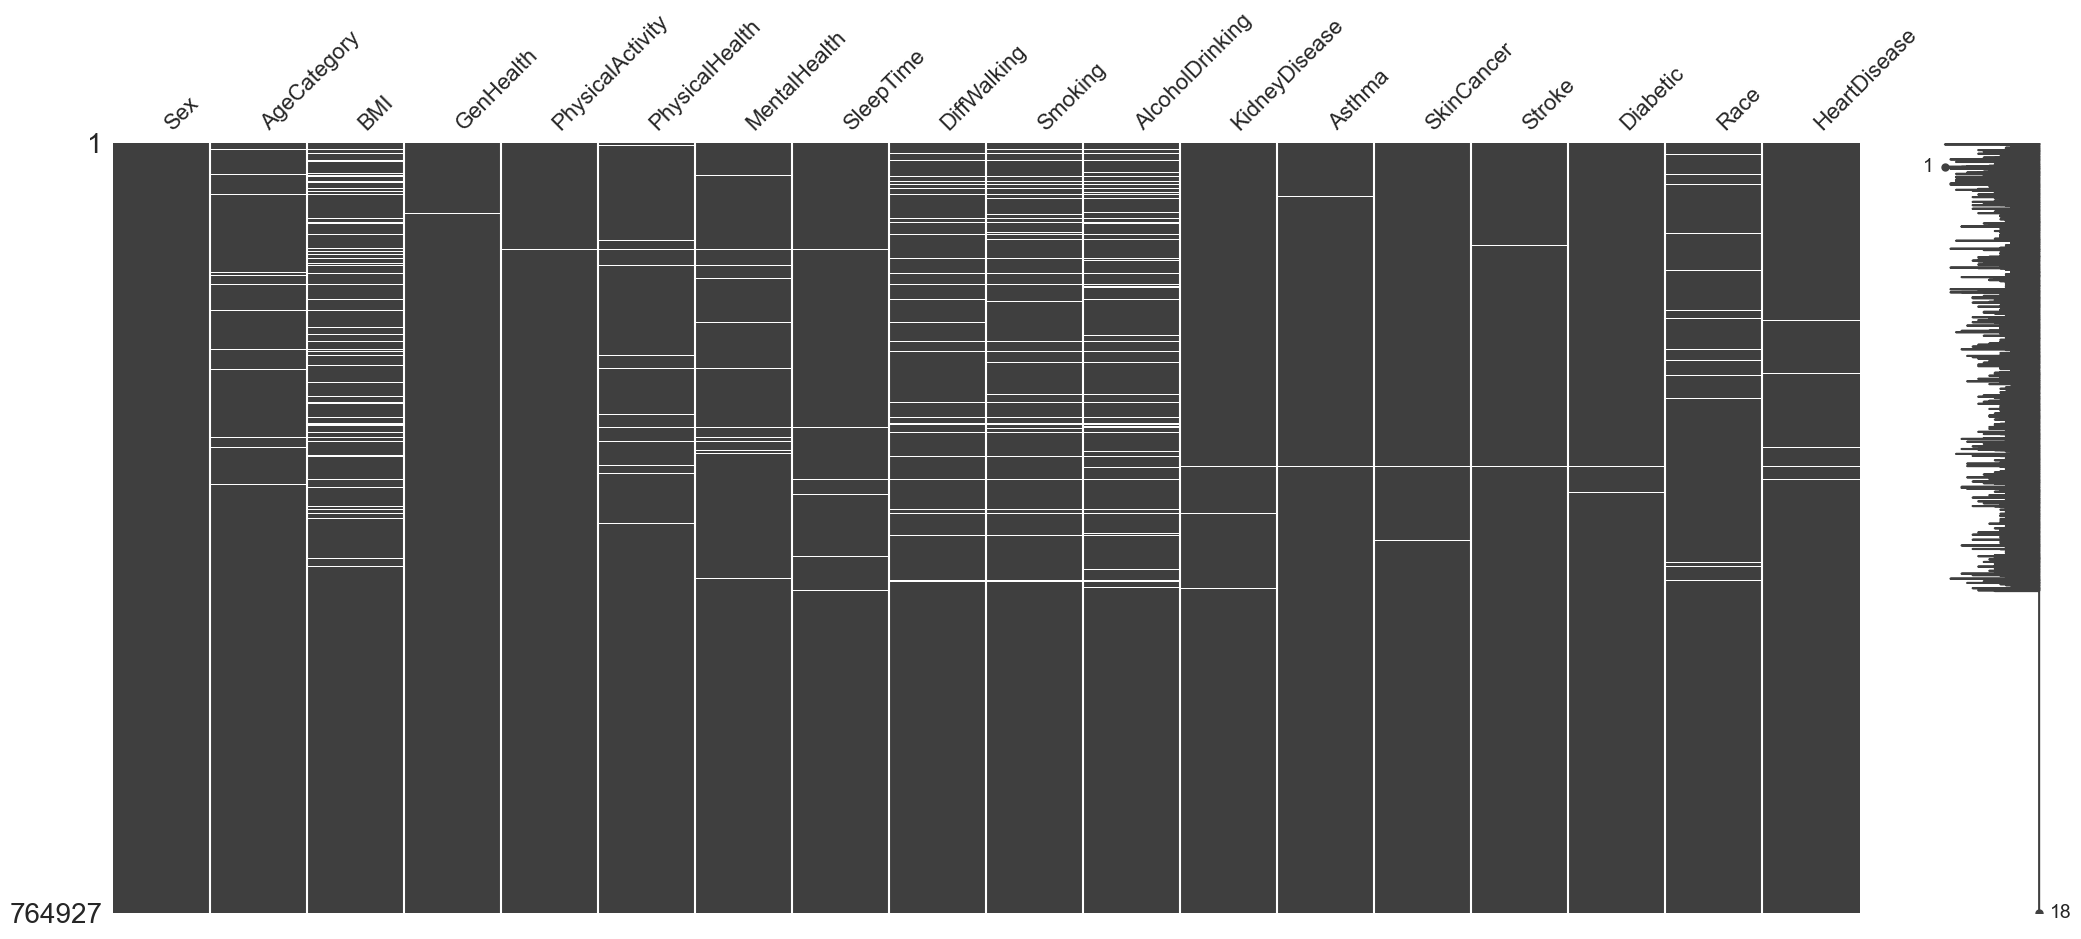

In [9]:
#viz missing
msno.matrix(df)
plt.show()

In [10]:
df = df.dropna()
df.isna().sum()

Sex                 0
AgeCategory         0
BMI                 0
GenHealth           0
PhysicalActivity    0
PhysicalHealth      0
MentalHealth        0
SleepTime           0
DiffWalking         0
Smoking             0
AlcoholDrinking     0
KidneyDisease       0
Asthma              0
SkinCancer          0
Stroke              0
Diabetic            0
Race                0
HeartDisease        0
dtype: int64

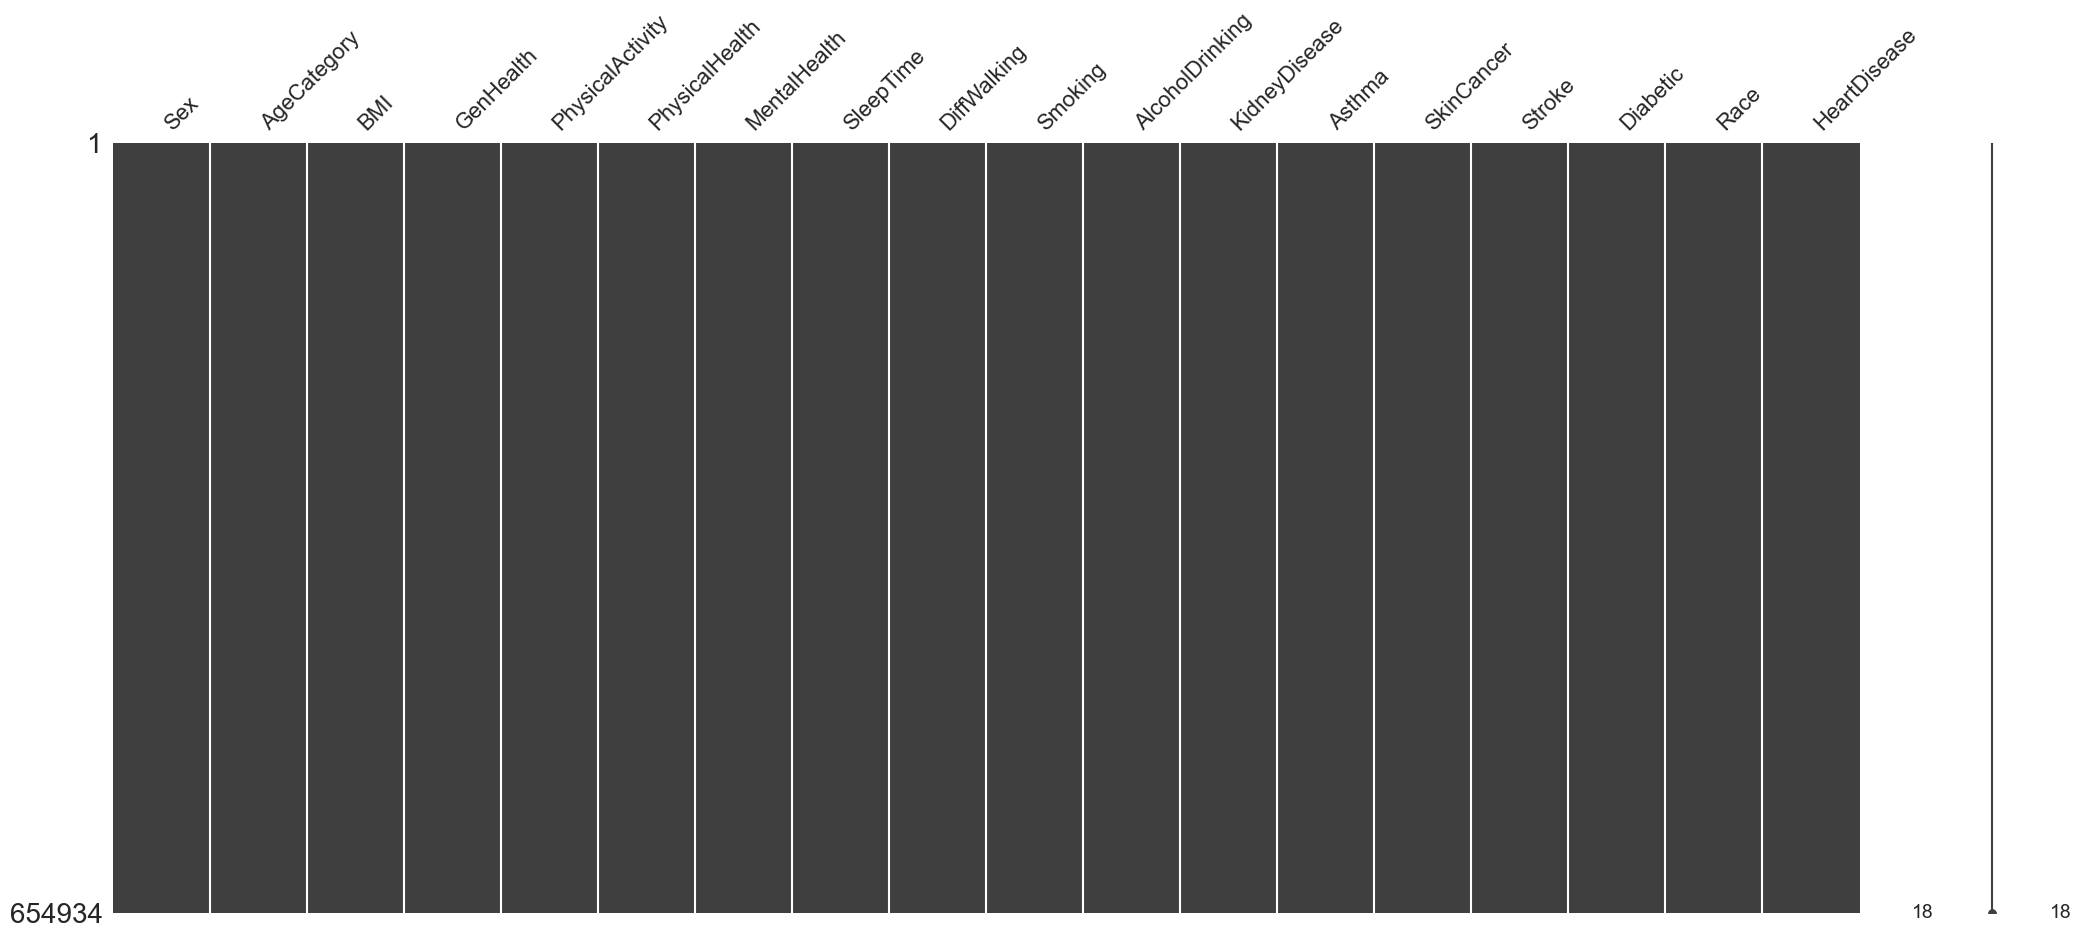

In [11]:
#viz missing
msno.matrix(df)
plt.show()

In [12]:
#check duplicate
df.duplicated().any()

True

In [13]:
df = df.drop_duplicates()
df.duplicated().any()

False

In [14]:
unique_values = df['Race'].value_counts()
print(unique_values)

White only, Non-Hispanic          243997
White                             227724
Hispanic                           58222
Black only, Non-Hispanic           25385
Black                              22810
Other race only, Non-Hispanic      16903
Other                              10891
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: Race, dtype: int64


In [15]:
# Define the mapping for renaming
mapping = {'White only, Non-Hispanic': 'White', 'Black only, Non-Hispanic': 'Black','Other race only, Non-Hispanic':'Other'}

# Replace values in the 'Race' column
df['Race'] = df['Race'].replace(mapping)

In [16]:
unique_values = df['Race'].value_counts()
print(unique_values)

White                             471721
Hispanic                           58222
Black                              48195
Other                              27794
Asian                               7993
Multiracial, Non-Hispanic           7602
American Indian/Alaskan Native      5192
Name: Race, dtype: int64


In [17]:
unique_values = df['AgeCategory'].value_counts()
print(unique_values)

Age 65 to 69       35076
Age 60 to 64       32956
Age 70 to 74       32543
65-69              31670
60-64              31219
70-74              29273
55-59              27610
Age 55 to 59       27470
Age 80 or older    25436
Age 50 to 54       25187
Age 75 to 79       24171
50-54              23736
80 or older        23352
Age 40 to 44       22619
Age 45 to 49       21452
Age 35 to 39       21418
75-79              20713
Age 18 to 24       20708
45-49              20518
18-24              19998
40-44              19837
35-39              19526
Age 30 to 34       19187
30-34              17953
Age 25 to 29       16779
25-29              16312
Name: AgeCategory, dtype: int64


In [18]:
# Replace 'to' with '-' in 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].str.replace(' to ', '-')

# Verify the changes
print(df['AgeCategory'].value_counts())

Age 65-69          35076
Age 60-64          32956
Age 70-74          32543
65-69              31670
60-64              31219
70-74              29273
55-59              27610
Age 55-59          27470
Age 80 or older    25436
Age 50-54          25187
Age 75-79          24171
50-54              23736
80 or older        23352
Age 40-44          22619
Age 45-49          21452
Age 35-39          21418
75-79              20713
Age 18-24          20708
45-49              20518
18-24              19998
40-44              19837
35-39              19526
Age 30-34          19187
30-34              17953
Age 25-29          16779
25-29              16312
Name: AgeCategory, dtype: int64


In [19]:
# Remove prefix 'Age' from 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].str.replace('Age ', '')

In [20]:
df.describe(include='object')

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
count,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719,626719
unique,2,13,5,2,2,6,2,2,2,2,2,6,7,2
top,Female,65-69,Very good,Yes,No,Never smoked,No,No,No,No,No,No,White,No
freq,327512,66746,216345,479969,532388,193470,428773,599870,533883,569844,600775,521320,471721,580929


In [21]:
# Define replacements
replacements = {
    'Yes, but only during pregnancy (female)': 'Yes (during pregnancy)',
    'No, pre-diabetes or borderline diabetes': 'No, borderline diabetes'
}

# Replace specified values in the 'Diabetic' column
df['Diabetic'].replace(replacements, inplace=True)

In [22]:
# Iterate over categorical columns, print column name, and display unique values

for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('*'*60 )

Column Name:  Sex
['Female' 'Male']
************************************************************
Column Name:  AgeCategory
['80 or older' '55-59' '40-44' '70-74' '65-69' '60-64' '75-79' '50-54'
 '45-49' '35-39' '30-34' '25-29' '18-24']
************************************************************
Column Name:  GenHealth
['Excellent' 'Very good' 'Fair' 'Poor' 'Good']
************************************************************
Column Name:  PhysicalActivity
['No' 'Yes']
************************************************************
Column Name:  DiffWalking
['No' 'Yes']
************************************************************
Column Name:  Smoking
['Never smoked' 'Former smoker' 'Current smoker - now smokes some days'
 'Current smoker - now smokes every day' 'Yes' 'No']
************************************************************
Column Name:  AlcoholDrinking
['No' 'Yes']
************************************************************
Column Name:  KidneyDisease
['No' 'Yes']
*************

<a id="2"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Exploratory Data Analysis </h1>
</div>

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42,
                                      stratify=df['HeartDisease'])
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, test.shape)

(501375, 18) (125344, 18)


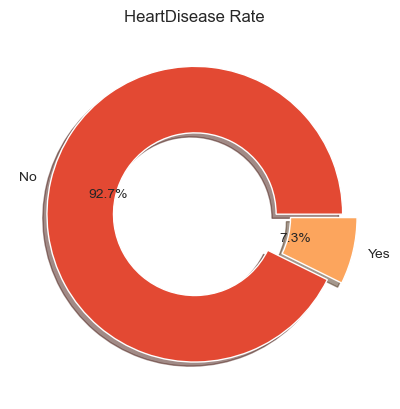

In [24]:
# Plotting the distribution
HeartDisease_rate = train["HeartDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
        wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
plt.title("HeartDisease Rate")
plt.show();

## HeartDisease in different sex 

In [25]:
gender_count = train['Sex'].value_counts()
gender_count

Female    261850
Male      239525
Name: Sex, dtype: int64

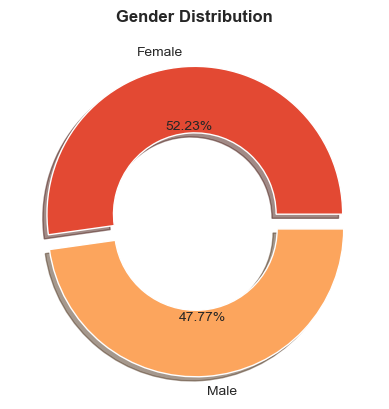

In [26]:
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%',
       wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
plt.show()

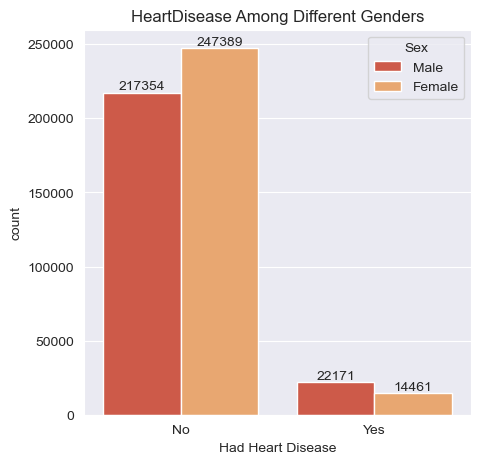

In [26]:
# Set figure size and style
plt.figure(figsize=(5, 5))

# Plot countplot
ax = sns.countplot(data=train, x='HeartDisease', hue='Sex')

# Customize plot
ax.set_title("HeartDisease Among Different Genders", fontsize=12)
ax.set_xlabel("Had Heart Disease", fontsize=10)
ax.set_ylabel("count", fontsize=10)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

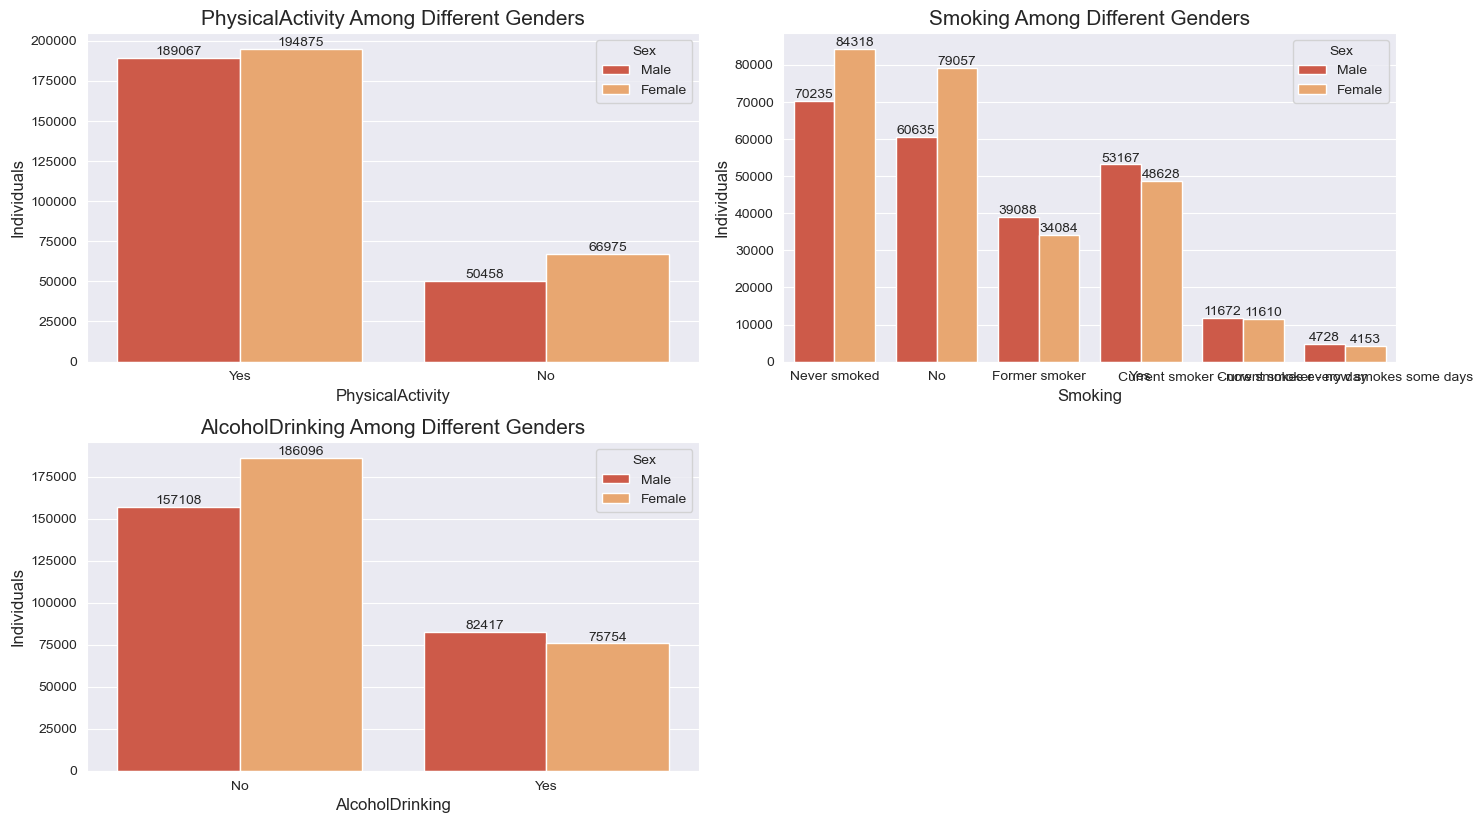

In [27]:
plt.figure(figsize=(15, 12))
risk_factors = ['PhysicalActivity', 'Smoking', 'AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=train, x=risk_factor, hue='Sex')
    plt.title(f"{risk_factor} Among Different Genders", fontsize=15)
    plt.xlabel(risk_factor, fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

## HeartDisease in different age group

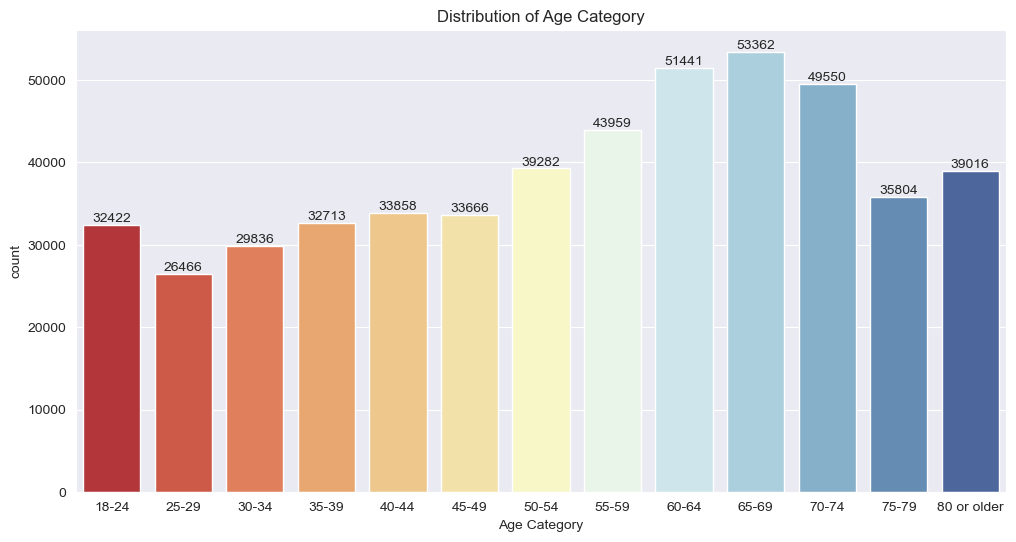

In [28]:
# Remove prefix 'Age' from 'AgeCategory' column
train['AgeCategory'] = train['AgeCategory'].str.replace('Age ', '')

# Set figure size and style
plt.figure(figsize=(12, 6))

# Plot countplot
ax = sns.countplot(data=train, x='AgeCategory', palette = 'RdYlBu',
                   order = train['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
ax.set_title('Distribution of Age Category', fontsize=12)
ax.set_xlabel('Age Category', fontsize=10)
ax.set_ylabel('count', fontsize=10)
ax.tick_params(axis='x', rotation=0)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

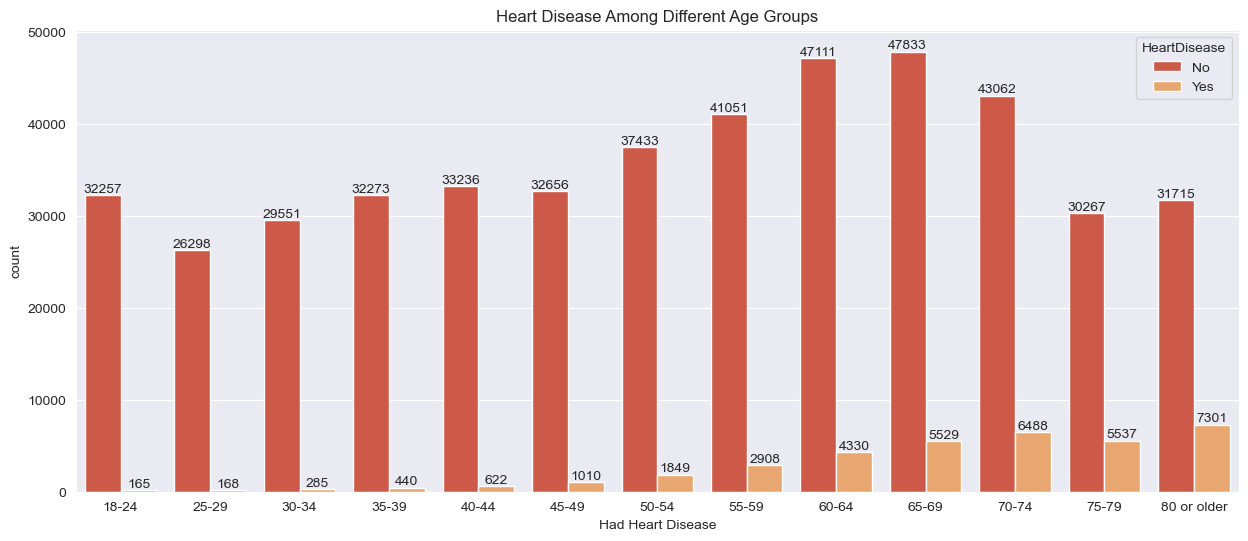

In [29]:
# Set figure size and style
plt.figure(figsize=(15, 6))

# Plot countplot
ax = sns.countplot(data=train, x='AgeCategory', hue='HeartDisease',
                   order = train['AgeCategory'].value_counts().sort_index().index.values)

# Customize plot
ax.set_title("Heart Disease Among Different Age Groups", fontsize=12)
ax.set_xlabel("Had Heart Disease", fontsize=10)
ax.set_ylabel("count", fontsize=10)

# Add labels to bars
for c in ax.containers:
    ax.bar_label(c)

# Show plot
plt.show()

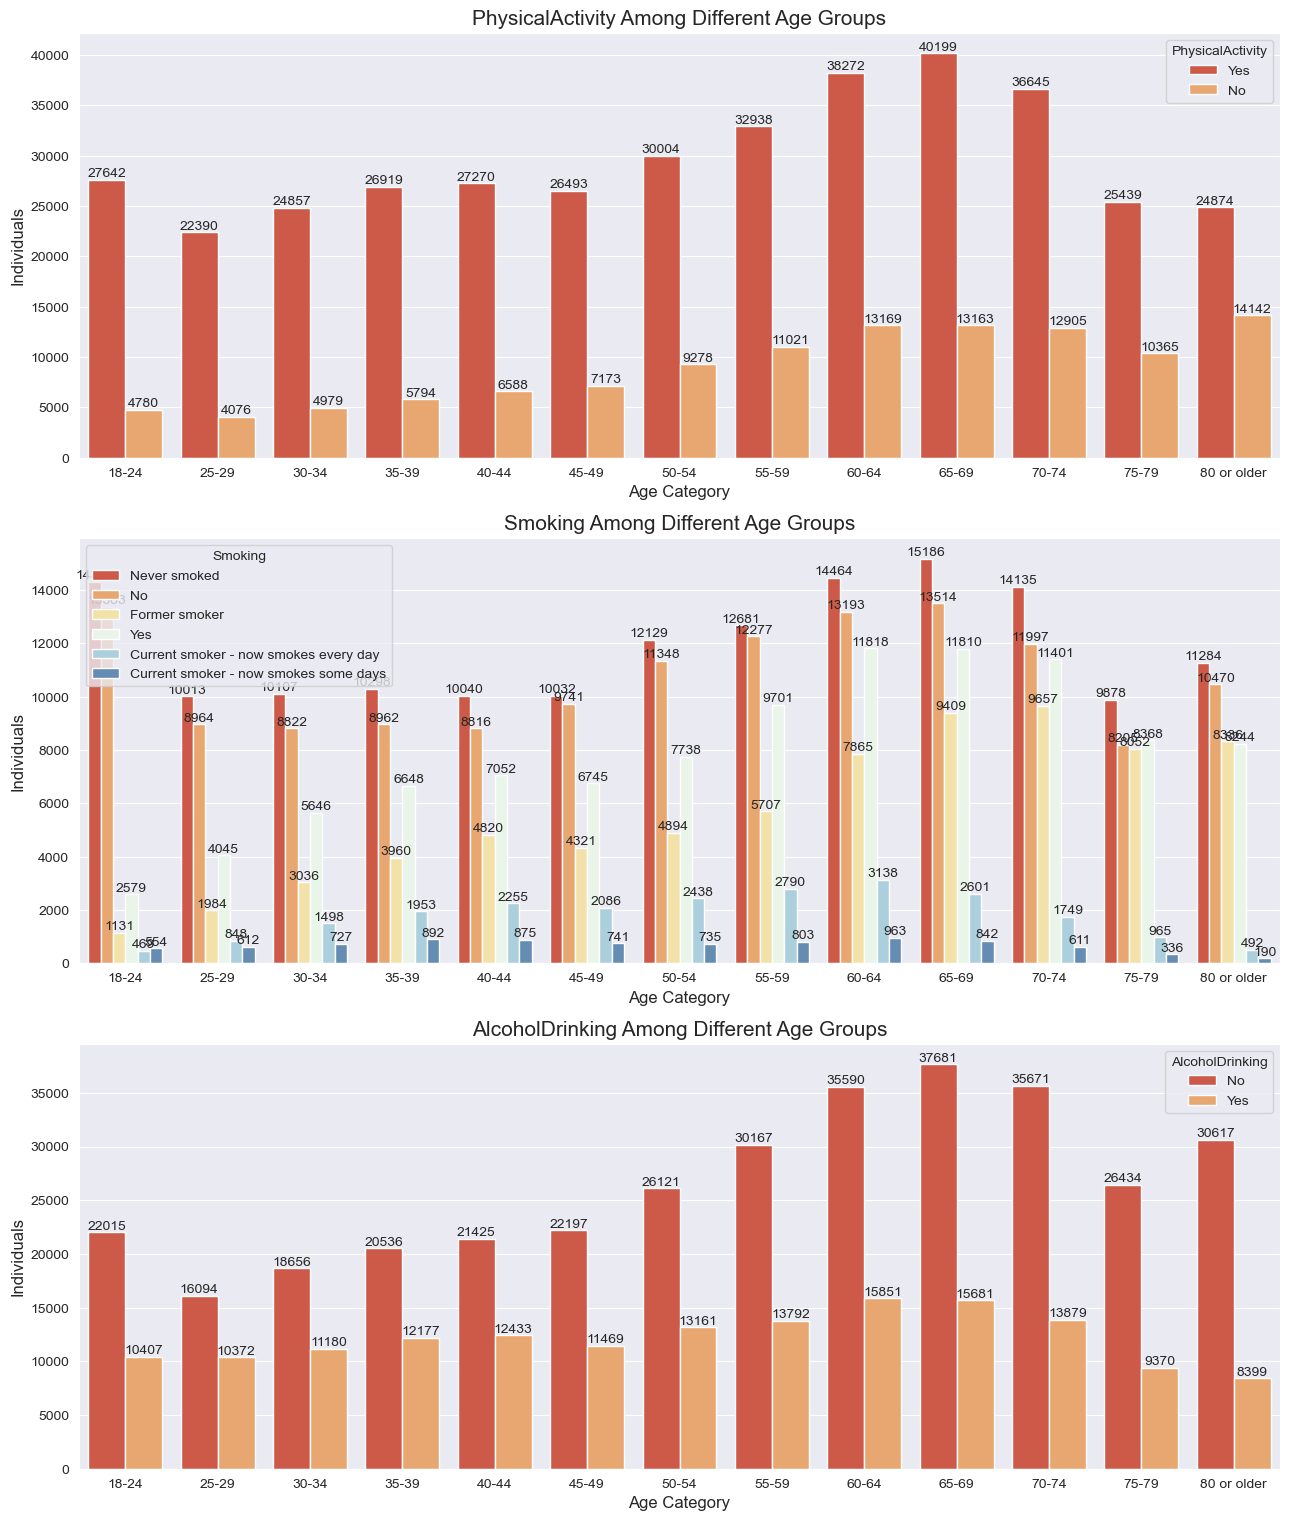

In [30]:
plt.figure(figsize=(13, 25))
risk_factors = ['PhysicalActivity' ,'Smoking','AlcoholDrinking']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    x = sns.countplot(data=train, x='AgeCategory', hue=risk_factor,
                     order = train['AgeCategory'].value_counts().sort_index().index.values)
    plt.title(f"{risk_factor} Among Different Age Groups", fontsize=15)
    plt.xlabel("Age Category", fontsize=12)
    plt.ylabel("Individuals", fontsize=12)
    for c in x.containers:
        x.bar_label(c)
plt.tight_layout()
plt.show()

### Diabetic

In [31]:
# How Many Individuals in the Dataset are Diabetic¶
train["Diabetic"].value_counts()

No                         417020
Yes                         68498
No, borderline diabetes     11559
Yes (during pregnancy)       4298
Name: Diabetic, dtype: int64

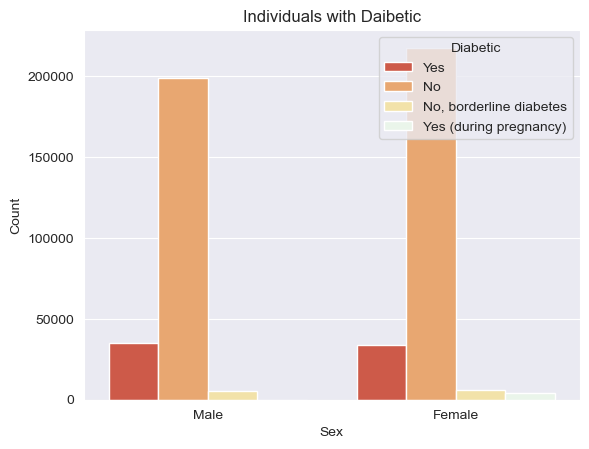

In [32]:
sns.countplot(x = "Sex", hue="Diabetic", data= train)
plt.title("Individuals with Daibetic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show();

### smoke 

In [33]:
train["Smoking"].unique()

array(['Never smoked', 'No', 'Former smoker', 'Yes',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [34]:
# Define replacements
replacements = {
    'Never smoked': 'No',
    'Former smoker': 'No',
    'Current smoker - now smokes some days': 'Yes',
    'Current smoker - now smokes every day': 'Yes'
}

# Replace specified values in the 'Diabetic' column
train['Smoking'].replace(replacements, inplace=True)

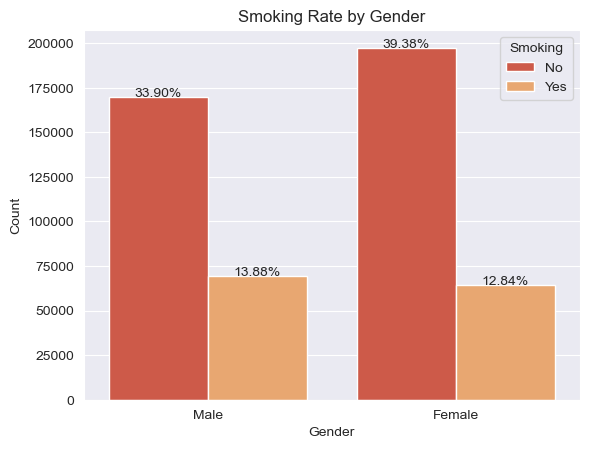

In [35]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=train)

# Add percentages on top of each bar
total = len(train)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

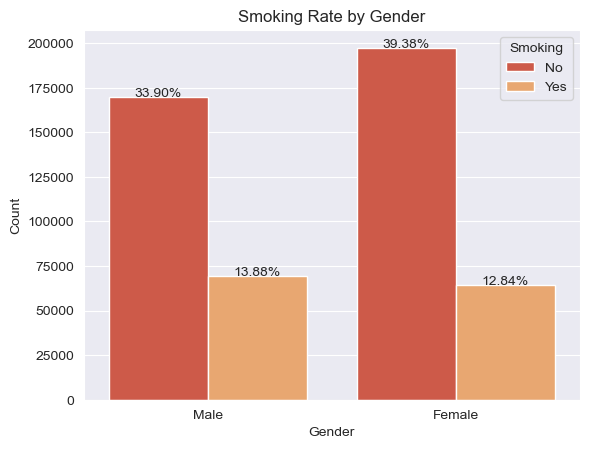

In [36]:
# Create countplot
ax = sns.countplot(x="Sex", hue="Smoking", data=train)

# Add percentages on top of each bar
total = len(train)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Asthma

In [37]:
train["Asthma"].unique()

array(['No', 'Yes'], dtype=object)

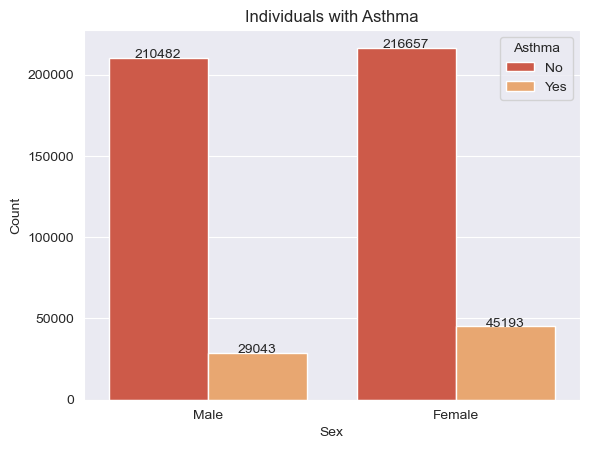

In [38]:
# Create countplot
ax = sns.countplot(x = "Sex", hue="Asthma", data= train)

# Add count values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{int(height)}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Individuals with Asthma')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### KidneyDisease

In [39]:
train['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

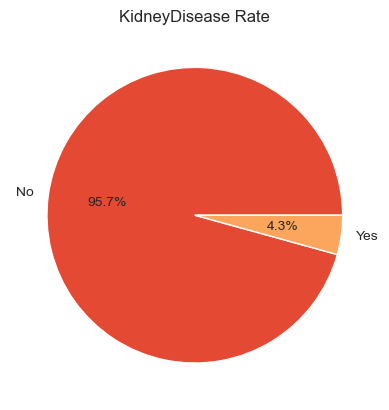

In [40]:
HeartDisease_rate = train["KidneyDisease"].value_counts()
plt.pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%1.1f%%")
plt.title("KidneyDisease Rate")
plt.show();


### outliers

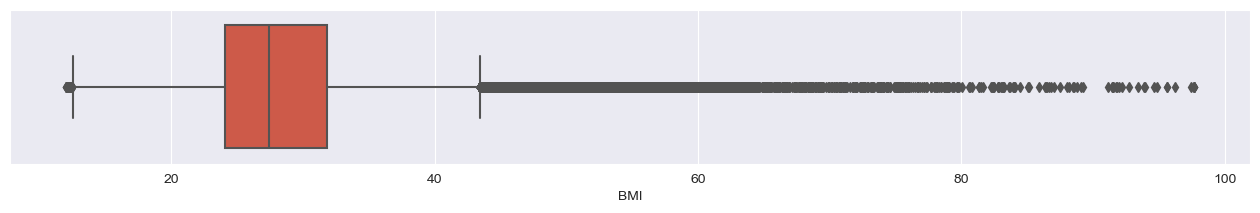

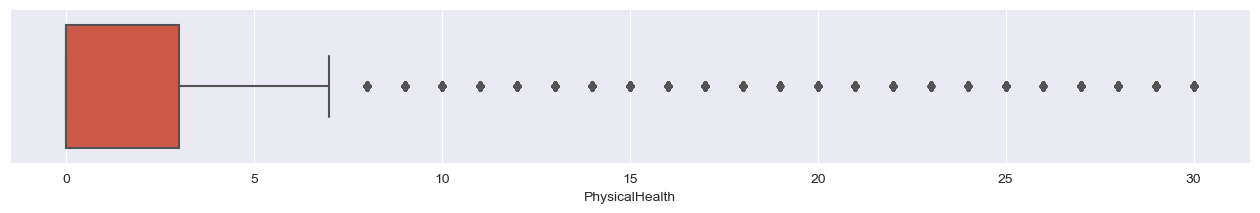

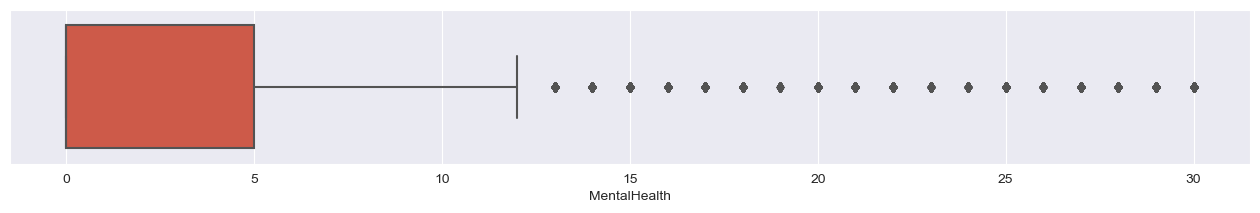

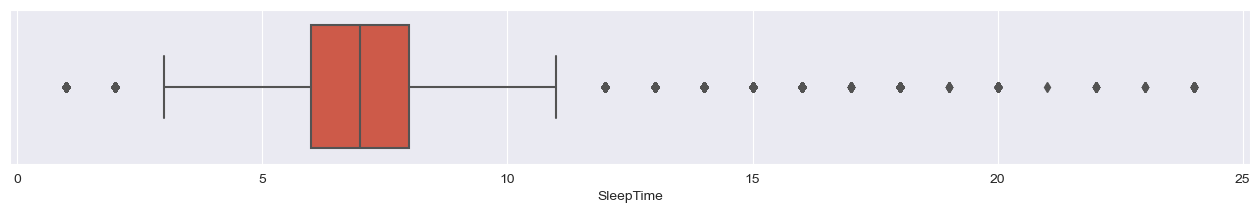

In [41]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=train, x=col)
    plt.show()

In [42]:
def get_outliers(train, column):
    # Calculate quartiles
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Extract outliers
    outliers = train[(train[column] < lower_limit) | (train[column] > upper_limit)]
    
    return outliers, lower_limit, upper_limit


In [43]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(train, 'SleepTime')
print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [44]:
def drop_outliers(dataframe, columns):
    new_df = dataframe.copy()  # Create a copy of the original DataFrame
    for column in columns:
        # Calculate quartiles
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Drop outliers
        dataframe = new_df[(new_df[column] >= lower_limit) & (new_df[column] <= upper_limit)]
    
    return dataframe

In [45]:
# List of columns to check for outliers
columns_to_check = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI',]

# Call the function to drop outliers from specified columns
train = drop_outliers(train, columns_to_check)

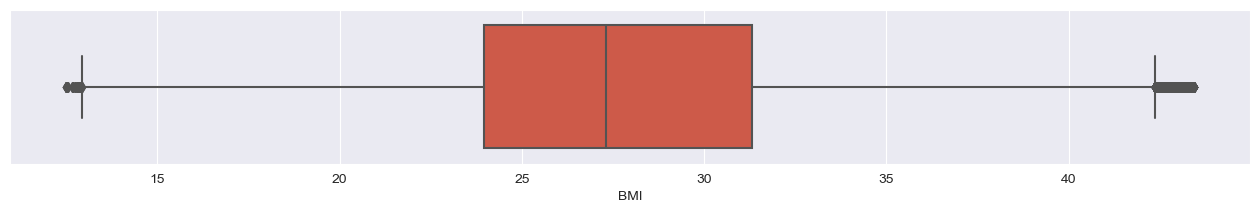

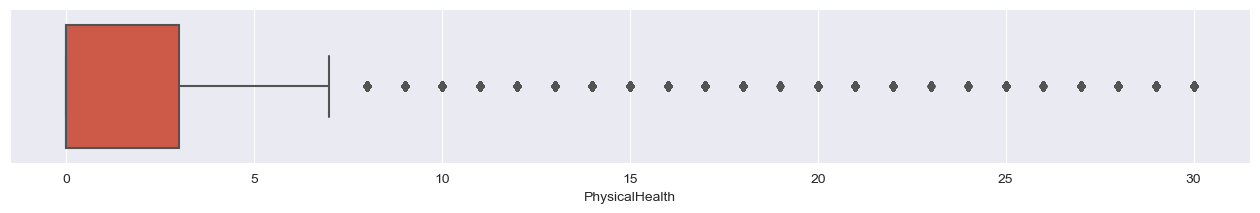

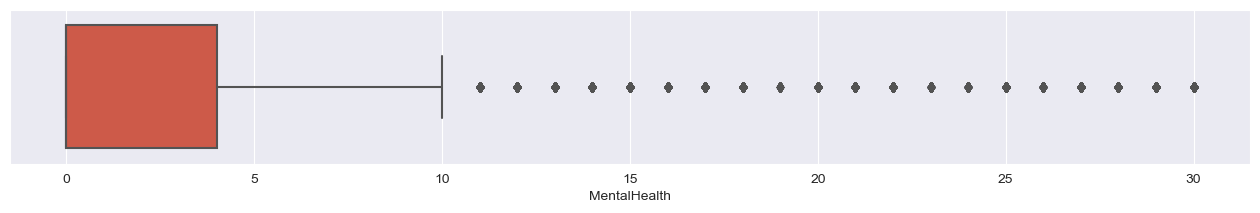

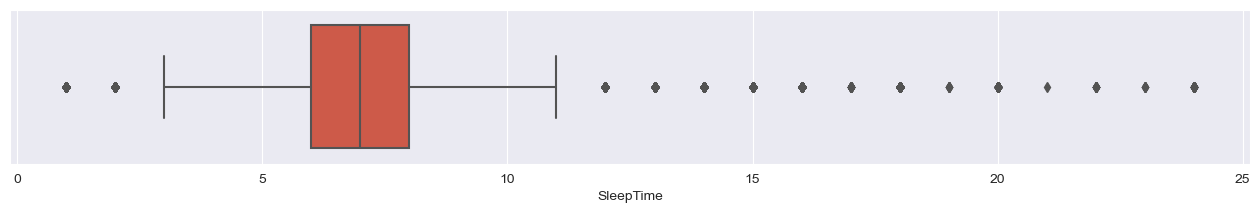

In [46]:
for col in train.describe().columns:
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=train, x=col)
    plt.show()

### Profiling Generate Report

In [49]:
!pip install ydata_profiling

^C


In [50]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Profiling Report")
# profile

<a id="4"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Preprocessing Pipelines </h1>
</div>

In [51]:
from sklearn.model_selection import train_test_split
temp, test = train_test_split(df, test_size = 0.2, random_state = 42,
                                      stratify=df['HeartDisease'])

train, val = train_test_split(temp, test_size = 0.125, random_state = 42,
                                      stratify=temp['HeartDisease'])

train = train.reset_index(drop = True)
val = val.reset_index(drop = True)
test = test.reset_index(drop = True)

print(train.shape, val.shape, test.shape)
print(round((100*train.shape[0]/df.shape[0]), 2),
      round((100*val.shape[0]/df.shape[0]), 2),
      round((100*test.shape[0]/df.shape[0]), 2))

(438703, 18) (62672, 18) (125344, 18)
70.0 10.0 20.0


In [52]:
X_train, y_train = train.drop(columns = 'HeartDisease'), train['HeartDisease']
X_val, y_val = val.drop(columns = 'HeartDisease'), val['HeartDisease']
X_test, y_test = test.drop(columns = 'HeartDisease'), test['HeartDisease']

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(438703, 17) (438703,)
(62672, 17) (62672,)
(125344, 17) (125344,)


In [53]:
num_attris = X_train.select_dtypes(np.number).columns
cat_attris = X_train.select_dtypes(object).columns

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

class OrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, random_state = 42):
        self.random_state = random_state
        
    def fit(self, X, y = None):
        self.encoding = { 
            'Sex' : dict(zip(['Female', 'Male'], [0, 1])),
            'GenHealth' : dict(zip(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], range(5))),
            'PhysicalActivity' : dict(zip(['No', 'Yes'], [0, 1])),
            'Stroke' : dict(zip(['No', 'Yes'], [0, 1])),
            'Asthma' :  dict(zip(['No', 'Yes'], [0, 1])),
            'SkinCancer' :  dict(zip(['No', 'Yes'], [0, 1])),
            'Diabetic' : dict(zip(['No',  'No, borderline diabetes', 'Yes (during pregnancy)','Yes'], range(4))),
            'AlcoholDrinking' : dict(zip(['No', 'Yes'], [0, 1])),
            'AgeCategory' : dict(zip(['18-24', '25-29', '30-34', '35-39',
                                        '40-44', '45-49', '50-54', '55-59',
                                        '60-64', '65-69', '70-74', '75-79',
                                        '80 or older'], range(14))),

            'KidneyDisease' : dict(zip(['No', 'Yes'], [0, 1])),
            'Smoking' : dict(zip(['Never smoked', 'No', 'Former smoker', 'Yes',
                                  'Current smoker - now smokes every day',
                                  'Current smoker - now smokes some days'], range(10))),

            'DiffWalking' :  dict(zip(['No', 'Yes'], [0, 1])),
                   }
        self.feature_names = X.columns
        
        return self
    
    def transform(self, X):
        X_ = X.copy()
        for col in self.encoding.keys():
            X_[col] = X_[col].map(self.encoding[col])
            X_[col] = X_[col].astype('int')
        return X_
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
encoder = OrdinalEncoder()
encoder.fit_transform(X_train[cat_attris]).head()

,Sex,AgeCategory,GenHealth,PhysicalActivity,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race
0,0,10,2,1,0,2,1,0,0,1,0,0,White
1,0,4,3,1,0,1,0,0,0,0,0,0,White
2,1,11,1,0,1,2,0,0,0,1,1,0,White
3,0,12,2,1,1,2,0,1,0,0,0,3,White
4,1,0,2,1,0,0,0,0,0,0,0,0,Hispanic


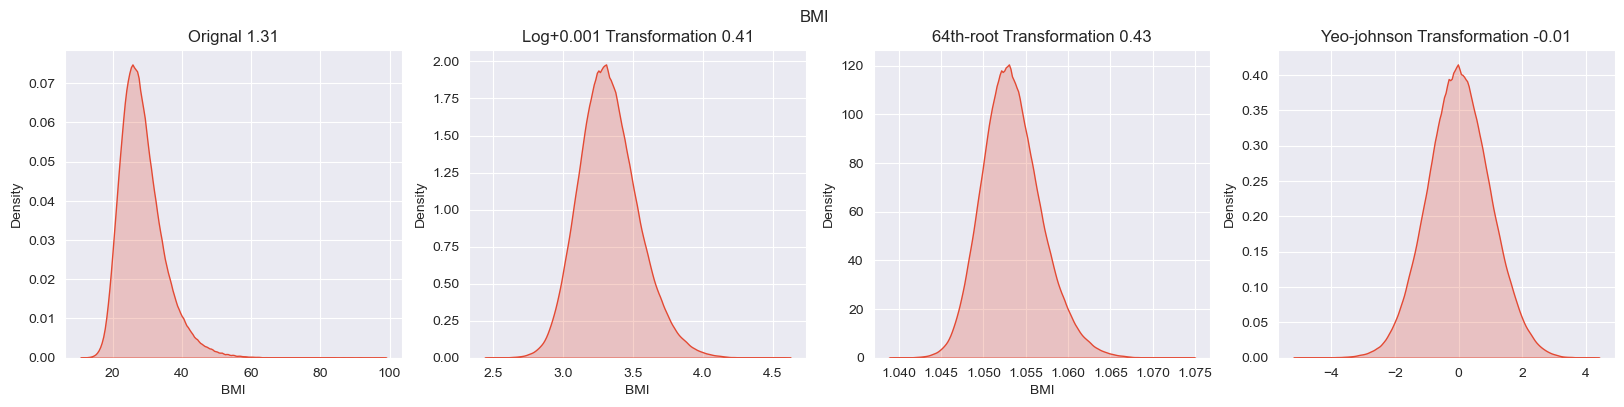

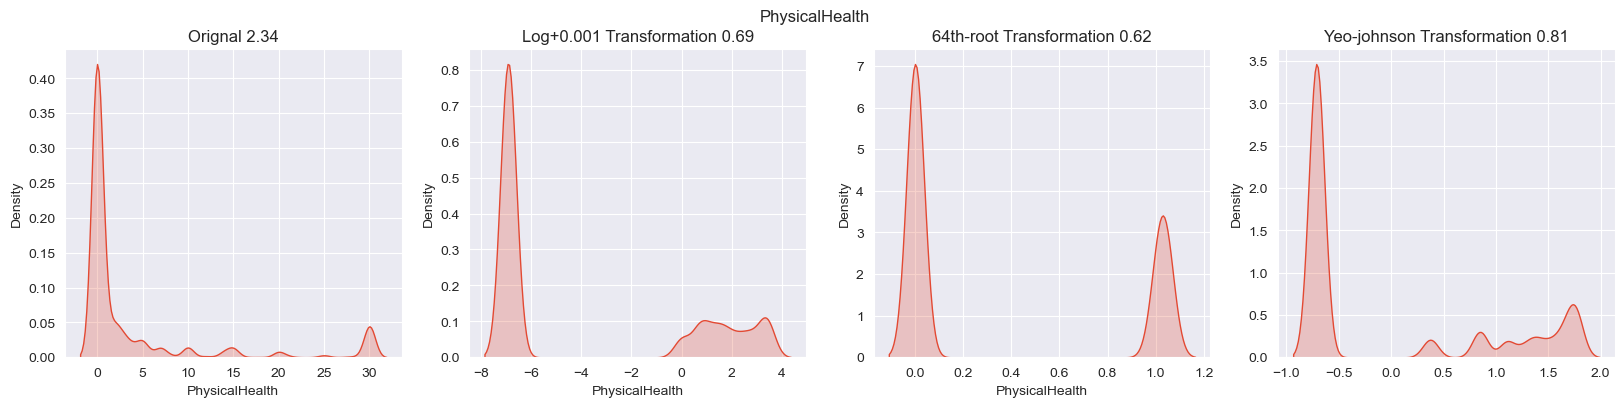

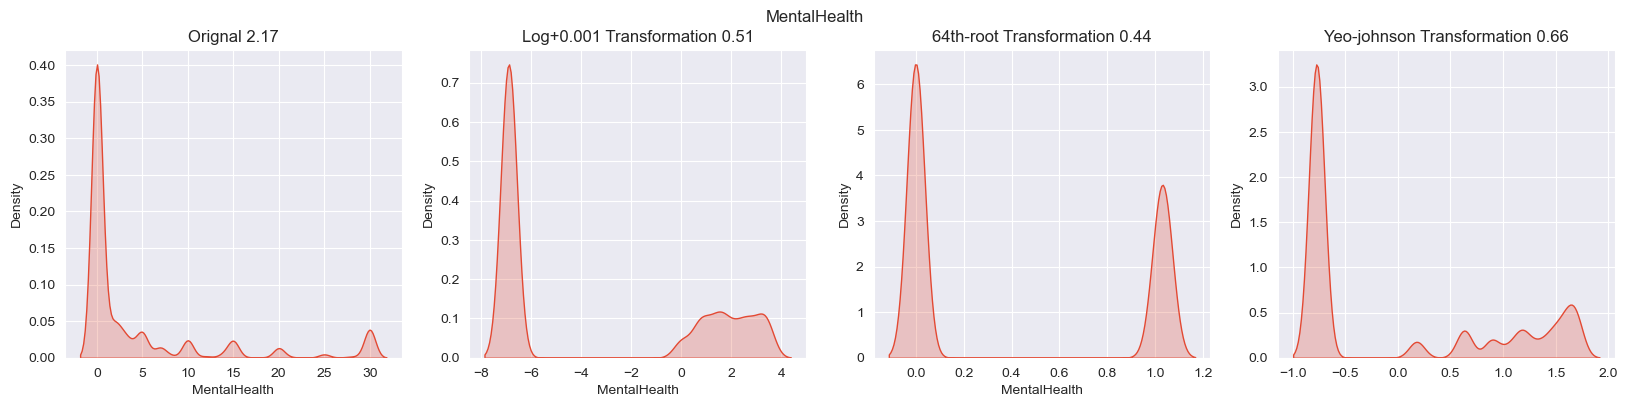

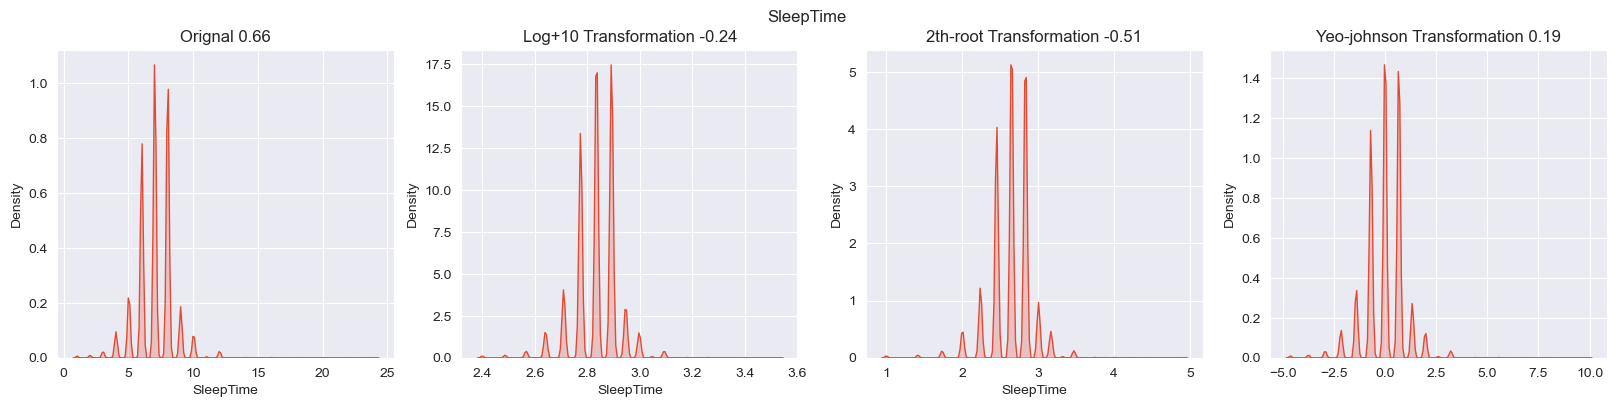

In [57]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

for attr in num_attris:
    fig, ax = plt.subplots(1, 4, figsize=(20,4))

    skf = X_train[attr].skew().round(2)
    sns.kdeplot(X_train[attr], fill = True, ax=ax[0])
    ax[0].set_title(f'Orignal {skf}')

    
    gridsv, x, skf = [0.001, 1, 10, 100, 1000, 10000], 0.001, 200
    for i in gridsv:
        n_skf = skew(np.log(i+X_train[attr]))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf    
            
    log_bmi = np.log(x+X_train[attr])
    skf = round( skew(log_bmi), 2)
    sns.kdeplot(log_bmi, fill = True, ax=ax[1])
    ax[1].set_title(f'Log+{x} Transformation {skf}')


    gridsv, x, skf = [1/2, 1/4, 1/8, 1/16, 1/32, 1/64], 1/2, 200
    for i in gridsv:
        n_skf = skew(np.power(X_train[attr], i))
        if abs(n_skf) < abs(skf):
            x, skf = i, n_skf  

    sqrt_bmi = np.power(X_train[attr], x)
    sns.kdeplot(sqrt_bmi, fill = True, ax=ax[2])
    skf = round(skew(sqrt_bmi), 2)
    ax[2].set_title(f'{int(1/x)}th-root Transformation {skf}')

    transformer = PowerTransformer()
    yeo_bmi = transformer.fit_transform((X_train[[attr]]+1))[:,  0]
    skf = round(skew(yeo_bmi), 2)
    sns.kdeplot(yeo_bmi, fill = True, ax=ax[3])
    ax[3].set_title(f'Yeo-johnson Transformation {skf}')

    plt.suptitle(attr)
    plt.show()

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ['SleepTime', 'BMI']
num_pipeline0 = Pipeline([
    ('transform', PowerTransformer()),
    ('scale',StandardScaler()) ])
num_pipeline0

Pipeline(steps=[('transform', PowerTransformer()), ('scale', StandardScaler())])

In [59]:
class NRootTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n = 1/2, random_state = 42):
        self.random_state = random_state
        self.n = n
        
    def fit(self, X, y = None):
        self.feature_names = X.columns
        return self
    
    def transform(self, X):
        return np.power(X, self.n)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    
    def get_feature_names_out(self, names = None):
        return self.feature_names
    
    
transformer = NRootTransformer(n = 1/32)
transformer.fit_transform(X_train[['PhysicalHealth', 'MentalHealth']]).head()

,PhysicalHealth,MentalHealth
0,1.062697,0.0
1,0.000000,0.0
2,0.000000,0.0
3,1.034928,0.0
4,0.000000,0.0


In [60]:
# ['PhysicalHealth', 'MentalHealth']
num_pipeline1 = Pipeline([
    ('transform', NRootTransformer(n = 1/32)),
    ('scale',StandardScaler()) ])
num_pipeline1


Pipeline(steps=[('transform', NRootTransformer(n=0.03125)),
                ('scale', StandardScaler())])

In [151]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder


ord_cat_attris = ['Sex', 'GenHealth', 'PhysicalActivity', 'Stroke', 'Asthma',
               'SkinCancer', 'Diabetic', 'AlcoholDrinking', 'AgeCategory',
               'KidneyDisease', 'Smoking', 'DiffWalking']

preprocessing_pipeline = ColumnTransformer([
    ('num_pipeline0', num_pipeline0, ['BMI', 'SleepTime']),
    ('num_pipeline1', num_pipeline1, ['PhysicalHealth', 'MentalHealth']),
    ('ord_pipeline', OrdinalEncoder(), ord_cat_attris),
    ('drop', 'drop', ['Race']),
                                ],
    remainder = "drop")

preprocessing_pipeline

ColumnTransformer(transformers=[('num_pipeline0',
                                 Pipeline(steps=[('transform',
                                                  PowerTransformer()),
                                                 ('scale', StandardScaler())]),
                                 ['BMI', 'SleepTime']),
                                ('num_pipeline1',
                                 Pipeline(steps=[('transform',
                                                  NRootTransformer(n=0.03125)),
                                                 ('scale', StandardScaler())]),
                                 ['PhysicalHealth', 'MentalHealth']),
                                ('ord_pipeline', OrdinalEncoder(),
                                 ['Sex', 'GenHealth', 'PhysicalActivity',
                                  'Stroke', 'Asthma', 'SkinCancer', 'Diabetic',
                                  'AlcoholDrinking', 'AgeCategory',
                                  'KidneyDisease', 'Smoking', 'DiffWalking']),
                                ('drop', 'drop', ['Race'])])

In [152]:
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_val_processed = preprocessing_pipeline.transform(X_val)
X_test_processed = preprocessing_pipeline.transform(X_test)

print(X_train_processed.shape)
X_train_processed[0]

(438703, 16)


array([-1.02297148,  1.31580739,  1.35768189, -0.80527766,  0.        ,
        2.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        , 10.        ,  0.        ,  2.        ,
        0.        ])

In [153]:
y_train = y_train.replace({'Yes': 1, 'No' : 0})
y_test = y_test.replace({'Yes': 1, 'No' : 0})
y_val = y_val.replace({'Yes': 1, 'No' : 0})

y_train.shape, y_test.shape, y_val.shape

((438703,), (125344,), (62672,))

<a id="5"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Sampling </h1>
</div>

### Firstly, setting a baseline model performance.

In [64]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression(max_iter=10000)
clr.fit(X_train_processed, y_train)

LogisticRegression(max_iter=10000)

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score


y_val_hat = clr.predict(X_val_processed)

under_sampling_scores = dict()
under_sampling_scores['LogisticRegressionBL'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }
print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

f1 score: 0.12930374904361133
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.52      0.07      0.13      4579

    accuracy                           0.93     62672
   macro avg       0.73      0.53      0.55     62672
weighted avg       0.90      0.93      0.90     62672



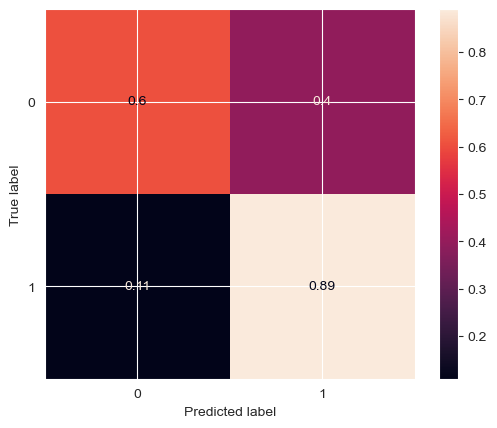

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_val_hat, normalize='true', cmap='rocket')
plt.grid('off')
plt.show()

### Under-sampling techniques
- Generating techniques
    - Cluster-Centroids
- Selection techniques Controled
    - Random-Under-Sampling
    - Near-Miss
- Selection techniques Cleaning
    - Tomek-Links
    - OneSidedSelection
    - EditedNearestNeighbours
    - RepeatedEditedNearestNeighbours
    - AllKNN
    - InstanceHardnessThreshold
    - NeighbourhoodCleaningRule
- Comibing best selection and cleaning techniques

### RandomUnderSampler

In [68]:
def plot_sampled_vs_notsampled(y_train, y_train_sampled, title):
    print(f'instances number before sampling: {y_train.shape[0]}')
    print(f"instances number after sampling: {y_train_sampled.shape[0]}")

    print(f"minority class percentage before sampling: {round(y_train.sum()/len(y_train), 3)}")
    print(f"minority class percentage after sampling: {y_train_sampled.sum()/len(y_train_sampled)}")
    
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    HeartDisease_rate = y_train.map({0:'No', 1:'Yes'}).value_counts()
    ax[0].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[0].set_title('original')
    HeartDisease_rate = y_train_sampled.map({0:'No', 1:'Yes'}).value_counts()
    ax[1].pie(HeartDisease_rate.values, labels= HeartDisease_rate.index, autopct="%.1f%%",
             wedgeprops=dict(width=0.45, edgecolor='w'), shadow = True, explode = [0, 0.1])
    ax[1].set_title('under-sampled')
    plt.suptitle(title)
    plt.show();

instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


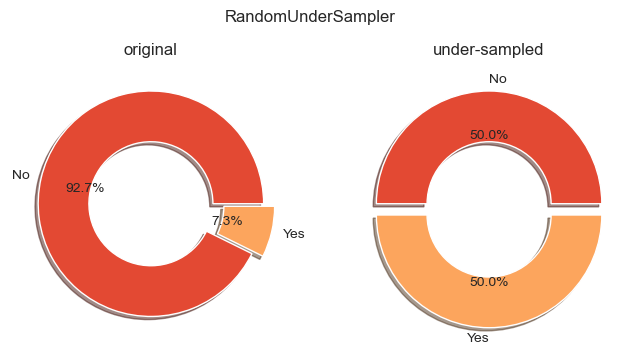

In [69]:
from imblearn.under_sampling import RandomUnderSampler

sampler  = RandomUnderSampler(sampling_strategy='majority')
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandomUnderSampler')

In [70]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandomUnderSampler'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.30906746884400516
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.79      0.31      4579

    accuracy                           0.74     62672
   macro avg       0.59      0.76      0.58     62672
weighted avg       0.92      0.74      0.80     62672



### ClusterCentroids

***ClusterCentroids Model takes too long to run so I resampled the dataset in batches***

In [71]:
n = 20
batch_size = len(X_train_processed) // n
remainder = len(X_train_processed) % n
X_batches = []
y_batches = []
idx, s = 0, 0
for i in range(n):
    batch_end = idx + batch_size + (1 if i < remainder else 0)
    X_batches.append(X_train_processed[idx:batch_end])
    y_batches.append(y_train[idx:batch_end])
    idx = batch_end
    s += X_batches[i].shape[0]
    assert X_batches[i].shape[0] == y_batches[i].shape[0]
    
assert X_train_processed.shape[0] == s
print(X_train_processed.shape[0], s, X_batches[0].shape )

438703 438703 (21936, 23)


0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


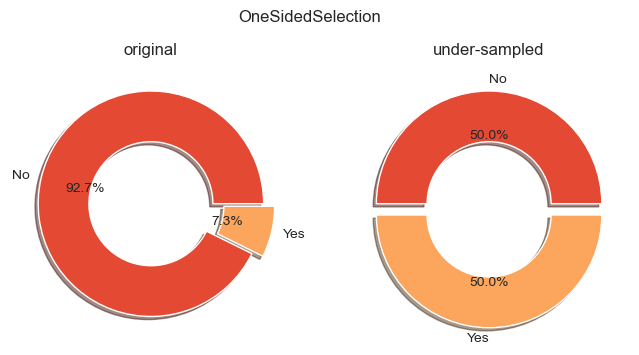

In [73]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = ClusterCentroids(sampling_strategy='majority', random_state = 42,
                           estimator = MiniBatchKMeans(n_init = 1, random_state=42, batch_size=2048))
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'OneSidedSelection')

In [74]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['ClusterCentroids'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3058602586538051
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.78      0.31      4579

    accuracy                           0.74     62672
   macro avg       0.58      0.76      0.57     62672
weighted avg       0.92      0.74      0.80     62672



### NearMiss

instances number before sampling: 438703
instances number after sampling: 64106
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.5


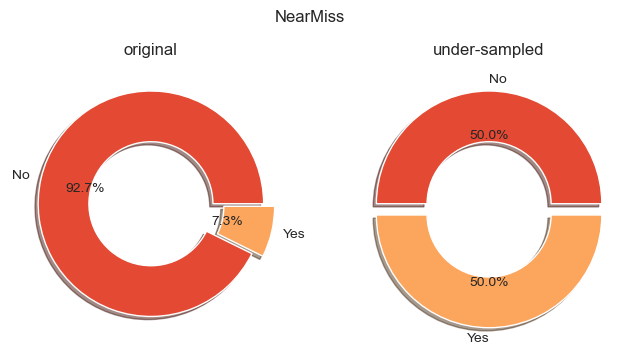

In [75]:
from imblearn.under_sampling import NearMiss

sampler = NearMiss(sampling_strategy='majority', n_neighbors=3)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NearMiss')

In [76]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NearMiss'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.16527790495375883
              precision    recall  f1-score   support

           0       0.96      0.39      0.55     58093
           1       0.09      0.79      0.17      4579

    accuracy                           0.42     62672
   macro avg       0.53      0.59      0.36     62672
weighted avg       0.90      0.42      0.53     62672



### OneSidedSelection

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 428811
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0747485488945013


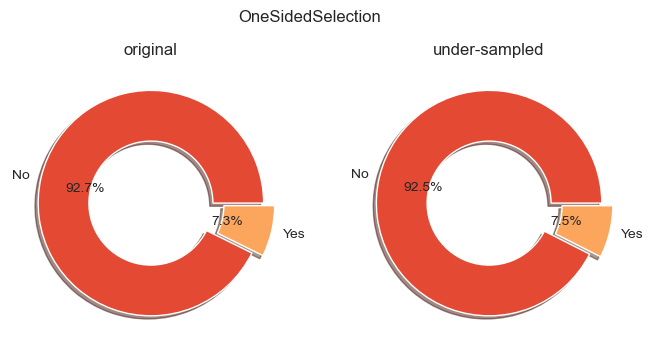

In [77]:
from imblearn.under_sampling import OneSidedSelection

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = OneSidedSelection(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'OneSidedSelection')

In [78]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['OneSidedSelection'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.1529346417330124
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.50      0.09      0.15      4579

    accuracy                           0.93     62672
   macro avg       0.72      0.54      0.56     62672
weighted avg       0.90      0.93      0.90     62672



### EditedNearestNeighbours

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 377173
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08498222301172141


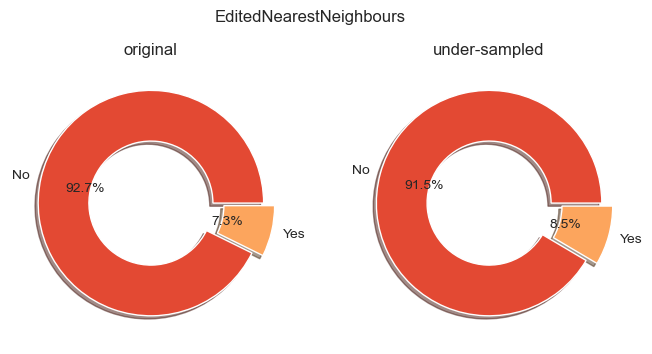

In [81]:
from imblearn.under_sampling import EditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'EditedNearestNeighbours')

In [82]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['EditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.2934812009737625
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     58093
           1       0.39      0.24      0.29      4579

    accuracy                           0.92     62672
   macro avg       0.66      0.60      0.62     62672
weighted avg       0.90      0.92      0.91     62672



### RepeatedEditedNearestNeighbours

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 349944
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.09159465514482318


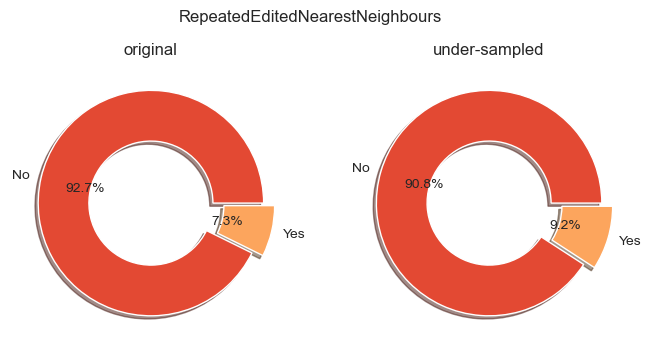

In [83]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)

X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RepeatedEditedNearestNeighbours')

In [84]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RepeatedEditedNearestNeighbours'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3566916699565732
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     58093
           1       0.33      0.39      0.36      4579

    accuracy                           0.90     62672
   macro avg       0.64      0.67      0.65     62672
weighted avg       0.91      0.90      0.90     62672



### TomekLinks

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 428811
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.0747485488945013


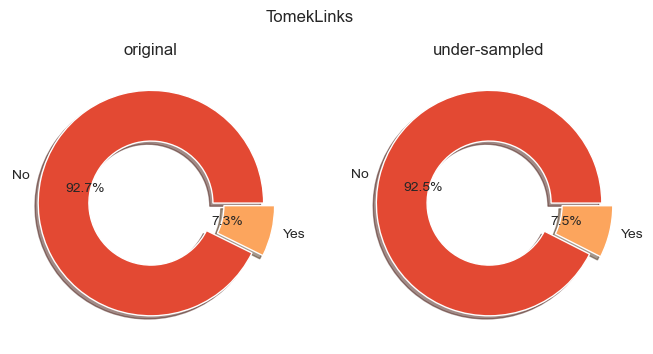

In [85]:
from imblearn.under_sampling import TomekLinks

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = TomekLinks(sampling_strategy='majority')
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'TomekLinks')

In [86]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['TomekLinks'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.15259259259259259
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     58093
           1       0.50      0.09      0.15      4579

    accuracy                           0.93     62672
   macro avg       0.72      0.54      0.56     62672
weighted avg       0.90      0.93      0.90     62672



### ALLKNN

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 364222
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08800401952655248


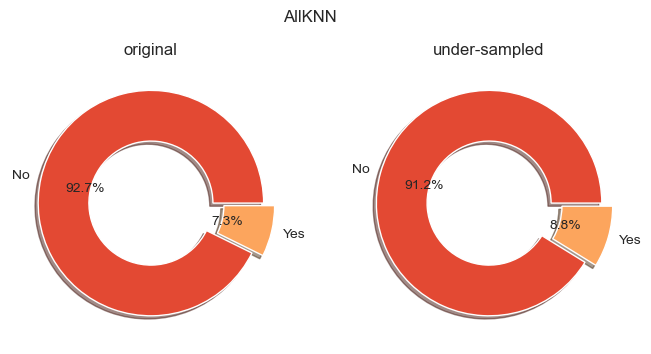

In [87]:
from imblearn.under_sampling import AllKNN

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = AllKNN(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'AllKNN')

In [88]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['AllKNN'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.3288384196829903
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     58093
           1       0.36      0.30      0.33      4579

    accuracy                           0.91     62672
   macro avg       0.65      0.63      0.64     62672
weighted avg       0.90      0.91      0.91     62672



### InstanceHardnessThreshold

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 152428
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.21028288765843545


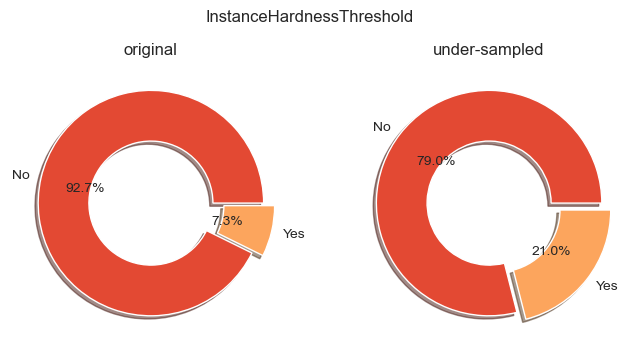

In [89]:
from imblearn.under_sampling import InstanceHardnessThreshold

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = InstanceHardnessThreshold(sampling_strategy='majority', cv=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'InstanceHardnessThreshold')

In [90]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['InstanceHardnessThreshold'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.27209533267130087
              precision    recall  f1-score   support

           0       0.98      0.64      0.78     58093
           1       0.16      0.87      0.27      4579

    accuracy                           0.66     62672
   macro avg       0.57      0.76      0.53     62672
weighted avg       0.92      0.66      0.74     62672



### NeighbourhoodCleaningRule

0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19
instances number before sampling: 438703
instances number after sampling: 375089
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.08545438549250978


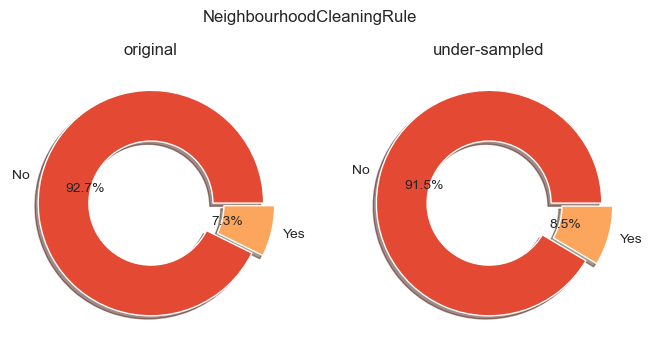

In [91]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

X_batches_sampled, y_batches_sampled = [], []
for i in range(n):
    print([f'{i}-', f'{i}\n'][i==n-1], end='')
    sampler = NeighbourhoodCleaningRule(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
    X, y = sampler.fit_resample(X_batches[i], y_batches[i])
    X_batches_sampled.append(X)
    y_batches_sampled.append(y)


X_train_resampled = np.concatenate(X_batches_sampled, axis=0)
y_train_resampled = pd.Series(np.concatenate(y_batches_sampled, axis=0))

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'NeighbourhoodCleaningRule')

In [92]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['NeighbourhoodCleaningRule'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.27866309406289663
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     58093
           1       0.39      0.22      0.28      4579

    accuracy                           0.92     62672
   macro avg       0.67      0.59      0.62     62672
weighted avg       0.90      0.92      0.91     62672



### Combining Best Selecting and Cleaning Techniques

instances number before sampling: 438703
instances number after sampling: 41606
minority class percentage before sampling: 0.073
minority class percentage after sampling: 0.6550978224294572


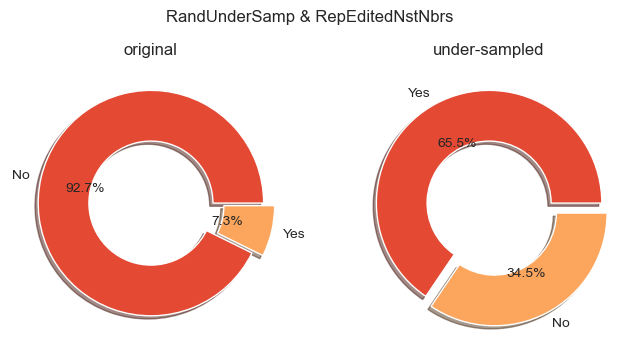

In [93]:
sampler  = RandomUnderSampler(sampling_strategy=1)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

sampler = RepeatedEditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3, n_jobs=-1)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_resampled, y_train_resampled)
y_train_resampled = pd.Series(y_train_resampled)

plot_sampled_vs_notsampled(y_train, y_train_resampled, 'RandUnderSamp & RepEditedNstNbrs')

Turns Out It's not a good idea :'''

In [97]:
clr.fit(X_train_resampled, y_train_resampled)
y_val_hat = clr.predict(X_val_processed)

print(f'f1 score: {f1_score(y_val, y_val_hat)}')
print(classification_report(y_val, y_val_hat))

under_sampling_scores['RandUnderSamp & RepEditedNstNbrs'] = {
        'recall' : recall_score(y_val, y_val_hat),
        'precision' : precision_score(y_val, y_val_hat),
        'accuracy' : accuracy_score(y_val, y_val_hat),
        'f1 score' : f1_score(y_val, y_val_hat)
    }

f1 score: 0.25752265479460706
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     58093
           1       0.15      0.89      0.26      4579

    accuracy                           0.62     62672
   macro avg       0.57      0.75      0.50     62672
weighted avg       0.92      0.62      0.71     62672



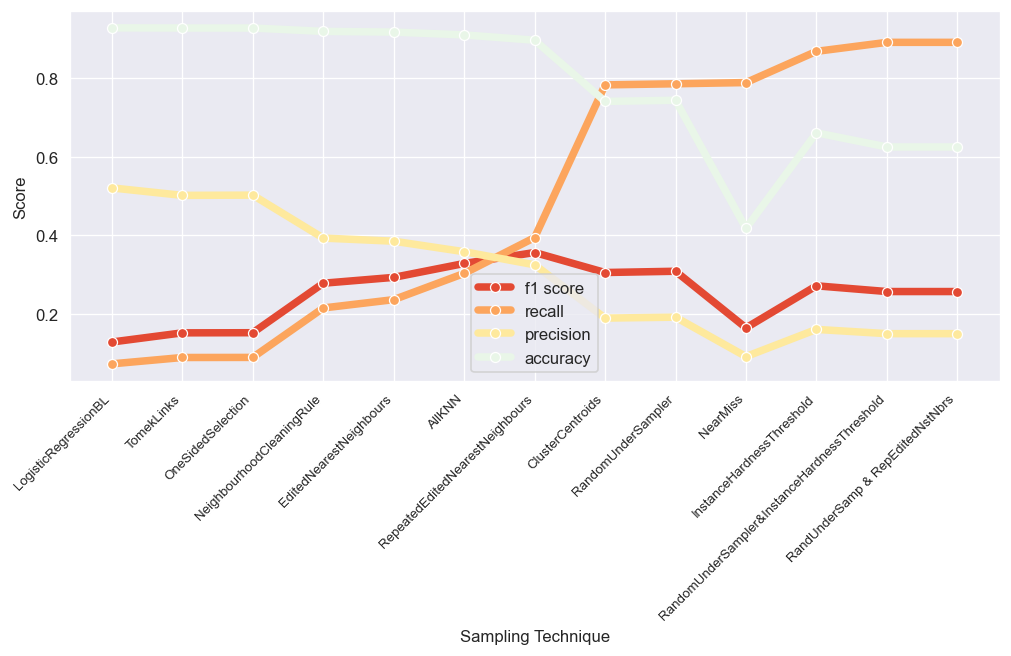

In [99]:
plt.figure(figsize=(10, 4), dpi = 120)
sampling_scores = pd.DataFrame(under_sampling_scores).T.sort_values(by = 'recall')


sns.lineplot(sampling_scores['f1 score'], marker = 'o', linewidth = 4.5, label = 'f1 score')
sns.lineplot(sampling_scores['recall'], marker = 'o', linewidth = 4.5, label = 'recall')
sns.lineplot(sampling_scores['precision'], marker = 'o', linewidth = 4.5, label = 'precision')
sns.lineplot(sampling_scores['accuracy'], marker = 'o', linewidth = 4.5, label = 'accuracy')

plt.xlabel('Sampling Technique')
plt.ylabel('Score')
plt.xticks(size=8,rotation=45, horizontalalignment='right',fontweight='light')
plt.legend()
plt.show()

<a id="6"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Modeling </h1>
</div>

In [154]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('classifier', LogisticRegression(max_iter=10000)),
])
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline0',
                                                  Pipeline(steps=[('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['BMI', 'SleepTime']),
                                                 ('num_pipeline1',
                                                  Pipeline(steps=[('transform',
                                                                   NRootTransformer(n=0.03125)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['PhysicalHealth',
                                                   'MentalHealth']),
                                                 ('ord_pipeline',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'GenHealth',
                                                   'PhysicalActivity', 'Stroke',
                                                   'Asthma', 'SkinCancer',
                                                   'Diabetic',
                                                   'AlcoholDrinking',
                                                   'AgeCategory',
                                                   'KidneyDisease', 'Smoking',
                                                   'DiffWalking']),
                                                 ('drop', 'drop', ['Race'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [155]:
sampler  = RandomUnderSampler(sampling_strategy='majority')
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_processed, y_train)

full_pipeline['classifier'].fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     58093
           1       0.19      0.79      0.31      4579

    accuracy                           0.74     62672
   macro avg       0.58      0.76      0.58     62672
weighted avg       0.92      0.74      0.80     62672



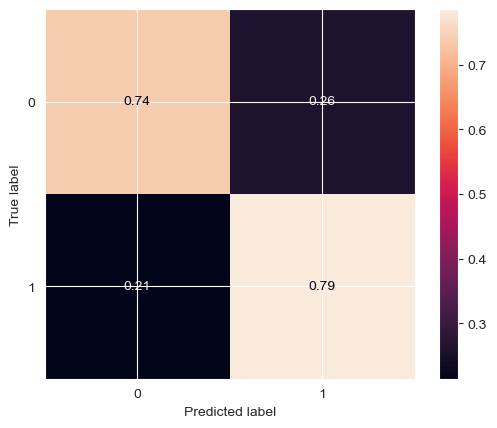

In [156]:
y_val_hat = full_pipeline['classifier'].predict(X_val_processed)
print(classification_report(y_val, y_val_hat))

ConfusionMatrixDisplay.from_predictions(y_val, y_val_hat, normalize='true', cmap='rocket')
plt.grid('off')
plt.show()

In [157]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, x0, x1, rc):
    plt.plot(thresholds, precisions[:-1], "--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)   
    plt.grid(True)                     
    plt.axis([x0, x1, 0, 1.])
    precision_recall_rc = precisions[np.argmin(recalls >= rc)]
    threshold_recall_rc = thresholds[np.argmin(recalls >= rc)]

    plt.plot([threshold_recall_rc, threshold_recall_rc], [x0, rc], "b:")
    plt.plot([x0, threshold_recall_rc], [rc, rc], "b:")
    plt.plot([x0, threshold_recall_rc], [precision_recall_rc, precision_recall_rc], "b:")
    plt.plot([threshold_recall_rc], [rc], "bo")
    plt.plot([threshold_recall_rc], [precision_recall_rc], "bo")


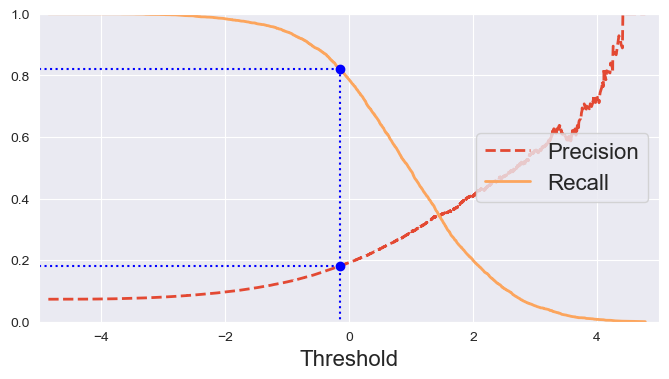

In [158]:
from sklearn.metrics import precision_recall_curve

y_val_score = full_pipeline['classifier'].decision_function(X_val_processed)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_score)

plt.figure(figsize=(8, 4))                                                          

plot_precision_recall_vs_threshold(precisions, recalls, thresholds, -5, 5, 0.82)
precision_recall_82 = precisions[np.argmin(recalls >= 0.82)]
threshold_recall_82 = thresholds[np.argmin(recalls >= 0.82)]

plt.show()

In [159]:
y_val_rc82 = np.int16(y_val_score > threshold_recall_82)
print(classification_report(y_val, y_val_rc82))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82     58093
           1       0.18      0.82      0.30      4579

    accuracy                           0.72     62672
   macro avg       0.58      0.76      0.56     62672
weighted avg       0.92      0.72      0.78     62672



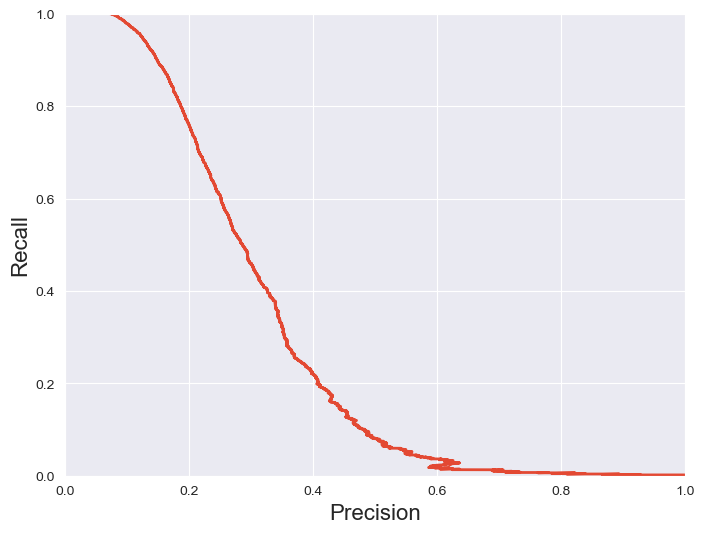

In [160]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(precisions, recalls, "-", linewidth=2)
    plt.ylabel("Recall", fontsize=16)
    plt.xlabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [161]:
X_train_preprocessed = full_pipeline['preprocessor'].fit_transform(X_train)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84    116186
           1       0.19      0.77      0.30      9158

    accuracy                           0.74    125344
   macro avg       0.58      0.75      0.57    125344
weighted avg       0.92      0.74      0.80    125344



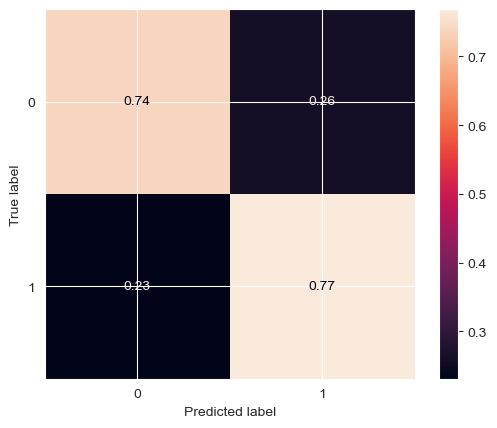

In [162]:
X_test_preprocessed = full_pipeline['preprocessor'].transform(X_test)
y_test_hat = full_pipeline['classifier'].predict(X_test_preprocessed)

print(classification_report(y_test, y_test_hat))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, normalize='true', cmap='rocket')
plt.grid('off')
plt.show()

In [163]:
full_pipeline['classifier']

LogisticRegression(max_iter=10000)

In [164]:
import joblib

joblib.dump(full_pipeline, 'LgRegRandUS_rc77acc74.pkl') 

['LgRegRandUS_rc77acc74.pkl']

<a id="7"></a>

<div style ="border-width:6px;
             border-radius:0px;
             border-style: solid;
             border-color:#b84848;
             background-color: #b84848;
             color:#ffffff;
             text-align: center;
             font: 14pt 'Fantasy';
             font-weight:bold;
             font-color:#ffffff">
    <h1> Hyper-Parameter Tunning </h1>
</div>